<a href="https://colab.research.google.com/github/katalinka09/1-labor/blob/main/__5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ практика 5. Задача регрессии

## **Цель занятия:**
Изучить задачу регрессии, познакомиться с метриками качества, реализовать модель для решения задачи с использованием разных моделей.

## **Задание состоит из следующих частей:**
1. Понимание значимости отбора признаков
2. Обучение регрессии
3. Метирки качества для регресии (только самые важные)
4. Регулязризация

## Задачи для домашки ⏰

1. Выбрать y = непрерывная переменая
2. Разделить на обучающую, тестовую и валидационную выборки
3. Выбрать лучшие признаки для X и выбрать лучший результат
4. Объяснить результаты метрик качества MAE, MSE, R2

**Для 👽**
5. Попробовать модель ```KNeighborsRegressor```, объяснить как работает модель, объяснить результат
6. Попробовать модель ```DecisionTreeRegressor```, объяснить как работает модель, объяснить результат

In [ ]:
! pip install pandas scikit-learn seaborn scipy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
try:
    df = pd.read_csv('/content/diamond.csv')
except FileNotFoundError:
    df = pd.read_csv('diamond.csv')

y = df['Price'] # выбираем целевую переменную (количественная)
X = df.drop('Price', axis=1) # переменные для проверки влияния

In [ ]:
X

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report
0,1.10,Ideal,H,SI1,VG,EX,GIA
1,0.83,Ideal,H,VS1,ID,ID,AGSL
2,0.85,Ideal,H,SI1,EX,EX,GIA
3,0.91,Ideal,E,SI1,VG,VG,GIA
4,0.83,Ideal,G,SI1,EX,EX,GIA
...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA
5996,1.00,Very Good,D,SI1,VG,VG,GIA
5997,1.02,Ideal,D,SI1,EX,EX,GIA
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA


Преобразование категориальных переменных остается без изменений

In [ ]:
category_columns = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=category_columns, drop_first=True)


In [ ]:
X

,carat weight,cut_Good,cut_Ideal,cut_Signature-Ideal,cut_Very Good,color_E,color_F,color_G,color_H,color_I,clarity_IF,clarity_SI1,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.10,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False
1,0.83,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False
2,0.85,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False
3,0.91,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False
4,0.83,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.03,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
5996,1.00,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
5997,1.02,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
5998,1.27,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False


In [ ]:
df_corr_test = X.copy()

# Добавляем целевую переменную в копию данных
df_corr_test['y'] = y
df_corr_test

,carat weight,cut_Good,cut_Ideal,cut_Signature-Ideal,cut_Very Good,color_E,color_F,color_G,color_H,color_I,clarity_IF,clarity_SI1,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,y
0,1.10,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,5169
1,0.83,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,3470
2,0.85,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,3183
3,0.91,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,4370
4,0.83,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,3171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.03,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,6250
5996,1.00,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,5328
5997,1.02,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,6157
5998,1.27,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,11206


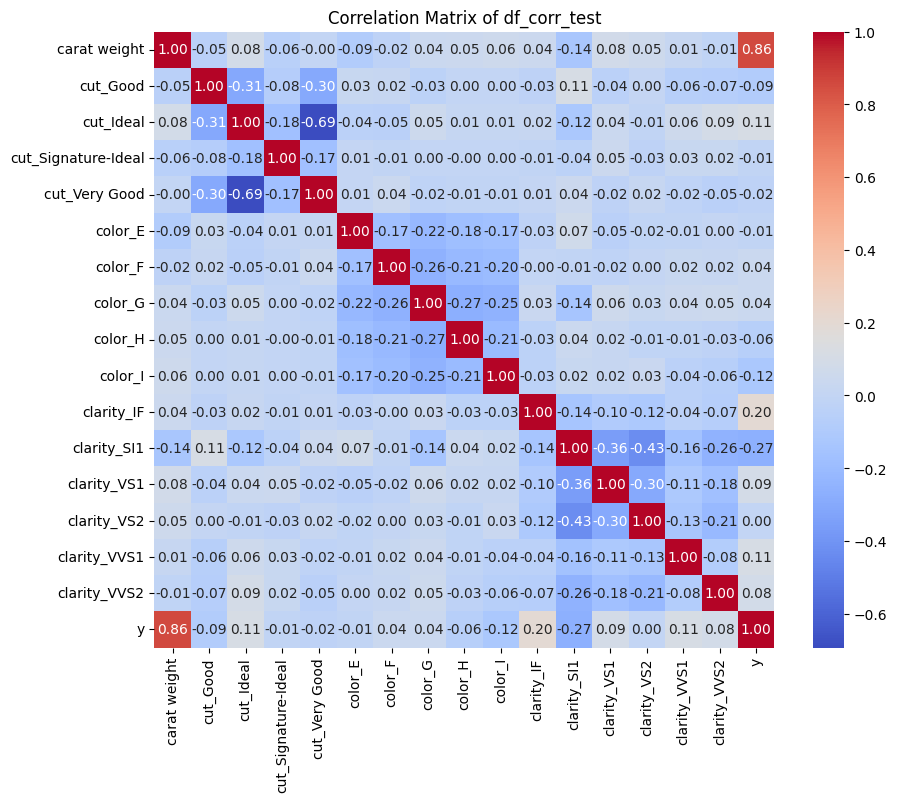

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что у вас уже есть DataFrame под названием df_corr_test
# Выводим матрицу корреляции (только для числовых столбцов)
correlation_matrix = df_corr_test.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of df_corr_test")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def resolve_regression(X, y, regularization=None):
    """
    Выполняет регрессию с учетом регуляризации.

    Parameters:
    - X: Входные данные (признаки).
    - y: Целевые значения.
    - regularization: Тип регуляризации ('l1', 'l2', None). Если None, используется обычная линейная регрессия.
    """
    # Разделение данных на обучающую и тестовую выборки (80% / 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Инициализация модели в зависимости от типа регуляризации
    if regularization == 'l1':
        model = Lasso() # L1-регуляризация (Lasso)
    elif regularization == 'l2':
        model = Ridge() # L2-регуляризация (Ridge)
    else:
        model = LinearRegression() # Линейная регрессия без регуляризации

    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)

    # Вычисление метрик качества
    mae = mean_absolute_error(y_test, y_pred) # Средняя абсолютная ошибка
    mse = mean_squared_error(y_test, y_pred)  # Средняя квадратичная ошибка
    r2 = r2_score(y_test, y_pred)             # Коэффициент детерминации (R^2)

    # Вывод результатов
    print(f"Regularization: {regularization}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

    return model, X_train, X_test, y_train, y_test


In [ ]:
resolve_regression(X, y)
None # Используем None (оператор ничего не делает) чтобы убрать вывод от return у функции resolve_regression. Пока он нам не нужен и и будет мешать


Regularization: None
Mean Absolute Error (MAE): 2389.50
Mean Squared Error (MSE): 16394574.88
R^2 Score: 0.85


In [ ]:
resolve_regression(X[['carat weight']], y)
None


Regularization: None
Mean Absolute Error (MAE): 2979.98
Mean Squared Error (MSE): 30108865.75
R^2 Score: 0.72


Теперь попробуем оптимизировать числовые переменные и сделать тоже самое

In [ ]:
X

,carat weight,cut_Good,cut_Ideal,cut_Signature-Ideal,cut_Very Good,color_E,color_F,color_G,color_H,color_I,clarity_IF,clarity_SI1,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.10,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False
1,0.83,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False
2,0.85,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False
3,0.91,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False
4,0.83,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.03,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
5996,1.00,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
5997,1.02,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
5998,1.27,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   carat weight         6000 non-null   float64
 1   cut_Good             6000 non-null   bool   
 2   cut_Ideal            6000 non-null   bool   
 3   cut_Signature-Ideal  6000 non-null   bool   
 4   cut_Very Good        6000 non-null   bool   
 5   color_E              6000 non-null   bool   
 6   color_F              6000 non-null   bool   
 7   color_G              6000 non-null   bool   
 8   color_H              6000 non-null   bool   
 9   color_I              6000 non-null   bool   
 10  clarity_IF           6000 non-null   bool   
 11  clarity_SI1          6000 non-null   bool   
 12  clarity_VS1          6000 non-null   bool   
 13  clarity_VS2          6000 non-null   bool   
 14  clarity_VVS1         6000 non-null   bool   
 15  clarity_VVS2         6000 non-null   b

Отбор признаков по корреляции

In [ ]:
import pandas as pd
import numpy as np

def select_features_correlation(X, y, max_features=5):
    # Вычисляем корреляцию признаков с целевой переменной
    correlation = X.apply(lambda col: np.abs(col.corr(y)))

    # Отбираем top-N признаков с наибольшей корреляцией
    top_features = correlation.nlargest(max_features).index

    # Возвращаем X и y с отобранными признаками
    return X[top_features], y


Отбор признаков с помощью RFE (Recursive Feature Elimination)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def select_features_rfe(X, y, max_features=5):
    # Инициализация модели линейной регрессии
    model = LinearRegression()

    # RFE с указанным количеством признаков
    selector = RFE(model, n_features_to_select=max_features)
    selector = selector.fit(X, y)

    # Отбор признаков
    selected_features = X.columns[selector.support_]

    # Возвращаем X и y с отобранными признаками
    return X[selected_features], y


In [ ]:
# Предположим, что у вас есть данные X и y
# Используем отбор на основе корреляции
X_selected_corr, y_selected_corr = select_features_correlation(X, y, max_features=5)

# Используем отбор с помощью RFE
X_selected_rfe, y_selected_rfe = select_features_rfe(X, y, max_features=5)


In [ ]:
resolve_regression(X_selected_corr, y_selected_corr)
None

Regularization: None
Mean Absolute Error (MAE): 2571.74
Mean Squared Error (MSE): 21403276.29
R^2 Score: 0.80


In [ ]:
resolve_regression(X_selected_rfe, y_selected_rfe)
None

Regularization: None
Mean Absolute Error (MAE): 6964.88
Mean Squared Error (MSE): 93916502.22
R^2 Score: 0.12


Regularization: None
Mean Absolute Error (MAE): 6964.88
Mean Squared Error (MSE): 93916502.22
R^2 Score: 0.12


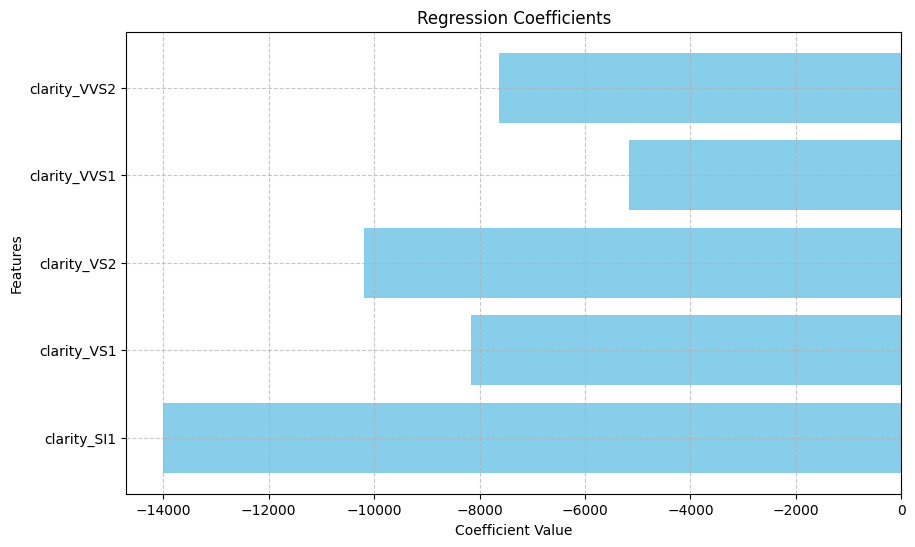

In [ ]:
import matplotlib.pyplot as plt

def plot_regression_coefficients(model, feature_names):
    # Извлекаем коэффициенты регрессии
    coefficients = model.coef_

    # Создаем столбчатую диаграмму для визуализации коэффициентов
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, coefficients, color='skyblue')
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.title("Regression Coefficients")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Пример использования:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe, None)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)


На графике отображены коэффициенты линейной регрессии для различных признаков. Коэффициенты показывают вклад каждого признака в модель. Например, положительный коэффициент для `type_white` указывает, что этот тип вина повышает прогнозируемое значение. Наибольшее влияние на модель оказывают признаки `type_white`, `density` и `volatile acidity`.

Метрики модели:
- **MAE** (Средняя абсолютная ошибка): 0.35 — средняя разница между предсказанными и фактическими значениями.
- **MSE** (Среднеквадратичная ошибка): 0.20 — средняя квадратичная ошибка, чувствительна к большим ошибкам.
- **R²** (Коэффициент детерминации): 0.86 — модель объясняет 86% дисперсии данных, что указывает на высокую точность.

**Дисперсия** — это мера разброса значений целевой переменной. Она показывает, насколько данные отклоняются от среднего.

**Коэффициент детерминации**
𝑅2 = 0.86 означает, что модель объясняет 86% вариации данных. Это значит, что 86% разброса в значениях целевой переменной модель смогла предсказать, а 14% остаются необъясненными (шум или неизвестные факторы).

In [ ]:
from sklearn.preprocessing import MinMaxScaler
print("Столбцы X_selected_rfe:", X_selected_rfe.columns.tolist())
X_selected_rfe = X_selected_rfe.astype(int)

# Проверяем типы данных
print("Доступные столбцы:", X_selected_rfe.columns)

# Проверяем типы данных и выбираем числовые признаки
numeric_features = X_selected_rfe.select_dtypes(include=['float64', 'int64']).columns.tolist()

if not numeric_features:
    print("Числовые признаки не найдены. Нормализация не требуется.")
else:
    # Применяем нормализацию
    scaler = MinMaxScaler()
    X_selected_rfe[numeric_features] = scaler.fit_transform(X_selected_rfe[numeric_features])
    print("Нормализация завершена для столбцов:", numeric_features)


Столбцы X_selected_rfe: ['clarity_SI1', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']
Доступные столбцы: Index(['clarity_SI1', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')
Нормализация завершена для столбцов: ['clarity_SI1', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']


In [ ]:
X_selected_rfe

,clarity_SI1,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
5995,1.0,0.0,0.0,0.0,0.0
5996,1.0,0.0,0.0,0.0,0.0
5997,1.0,0.0,0.0,0.0,0.0
5998,0.0,1.0,0.0,0.0,0.0


Regularization: None
Mean Absolute Error (MAE): 6964.88
Mean Squared Error (MSE): 93916502.22
R^2 Score: 0.12


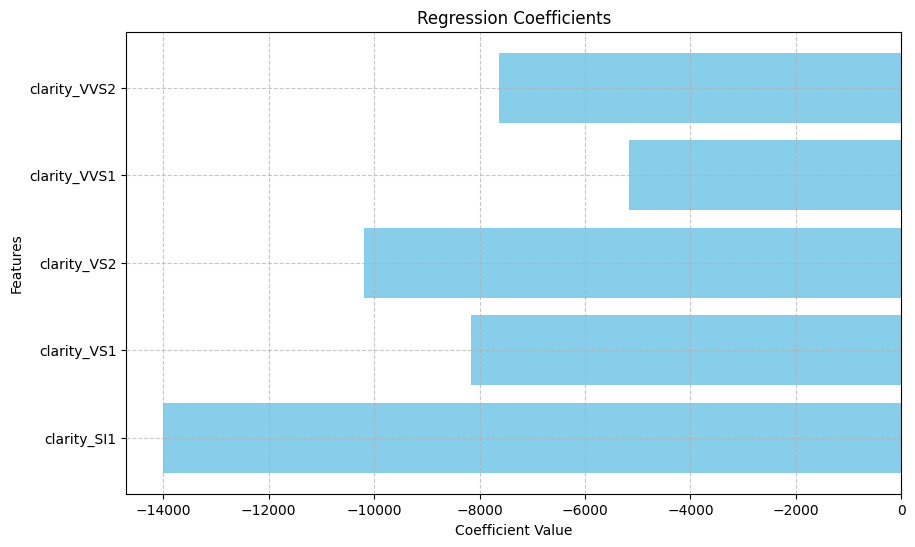

In [ ]:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)


## Пару слов про метрики

In [ ]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик качества
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Absolute Error (MAE): 6964.88
Mean Squared Error (MSE): 93916502.22
R^2 Score: 0.12


Про метрики качества в регресии - https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii#regressiya

## Регуляризация

In [ ]:
X

,carat weight,cut_Good,cut_Ideal,cut_Signature-Ideal,cut_Very Good,color_E,color_F,color_G,color_H,color_I,clarity_IF,clarity_SI1,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.10,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False
1,0.83,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False
2,0.85,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False
3,0.91,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False
4,0.83,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.03,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
5996,1.00,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
5997,1.02,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
5998,1.27,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False


Про регуляризацию - https://yandex.ru/q/datascience/10672717313/

1. **L1-регуляризация (Lasso)**:
   Формула для L1-регуляризации добавляет штраф, который равен сумме абсолютных значений весов модели. Это может привести к обнулению некоторых весов, то есть к выбору только наиболее значимых признаков.

   Формула для L1-регуляризации:
   J(θ) = Функция потерь + λ * Σ|θ_i|

   где:
   - J(θ) — общая функция потерь с регуляризацией,
   - Функция потерь — это функция, измеряющая ошибку модели (например, среднеквадратическая ошибка),
   - λ — коэффициент регуляризации, который контролирует степень штрафа,
   - Σ|θ_i| — сумма абсолютных значений всех весов модели (θ_i).

2. **L2-регуляризация (Ridge)**:
   Формула для L2-регуляризации добавляет штраф, который равен сумме квадратов весов модели. Это не обнуляет веса, но снижает их величину, что приводит к более простым и менее подверженным переобучению моделям.

   Формула для L2-регуляризации:
   J(θ) = Функция потерь + λ * Σθ_i^2

   где:
   - J(θ) — общая функция потерь с регуляризацией,
   - Σθ_i^2 — сумма квадратов всех весов модели (θ_i).

3. **Elastic Net**:
   Это комбинированный метод, который использует и L1-штраф, и L2-штраф. Он полезен, когда нужно балансировать преимущества обоих методов.

   Формула для Elastic Net:
   J(θ) = Функция потерь + λ_1 * Σ|θ_i| + λ_2 * Σθ_i^2

   где:
   - λ_1 и λ_2 — коэффициенты регуляризации для L1 и L2 частей соответственно.

Регуляризация помогает улучшить обобщающую способность модели и предотвращает её переобучение.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.151e+10, tolerance: 4.943e+07
  model = cd_fast.enet_coordinate_descent(


Regularization: l1
Mean Absolute Error (MAE): 2395.21
Mean Squared Error (MSE): 16374632.58
R^2 Score: 0.85


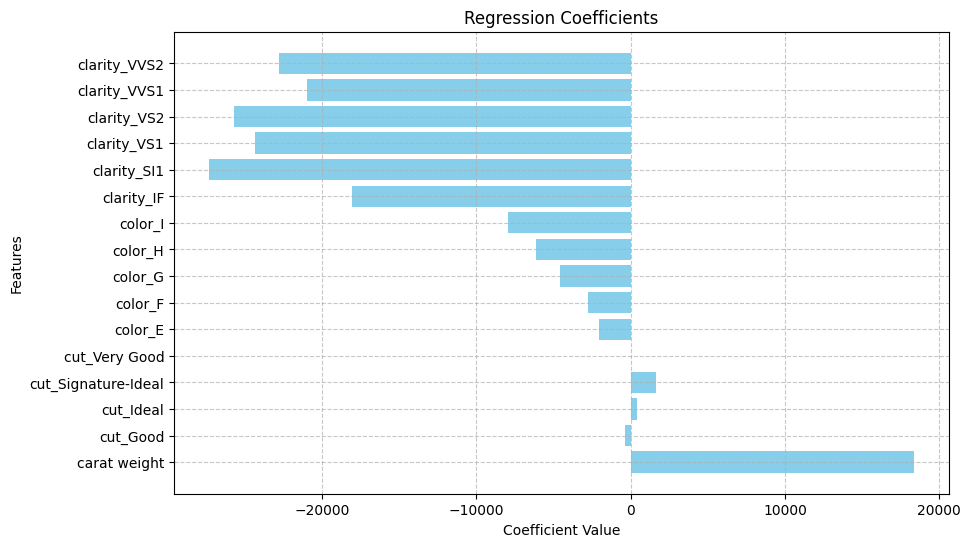

In [ ]:
# L1-регуляризация
model, _, _, _, _ = resolve_regression(X, y, regularization='l1')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)


Regularization: l2
Mean Absolute Error (MAE): 2403.65
Mean Squared Error (MSE): 16348667.08
R^2 Score: 0.85


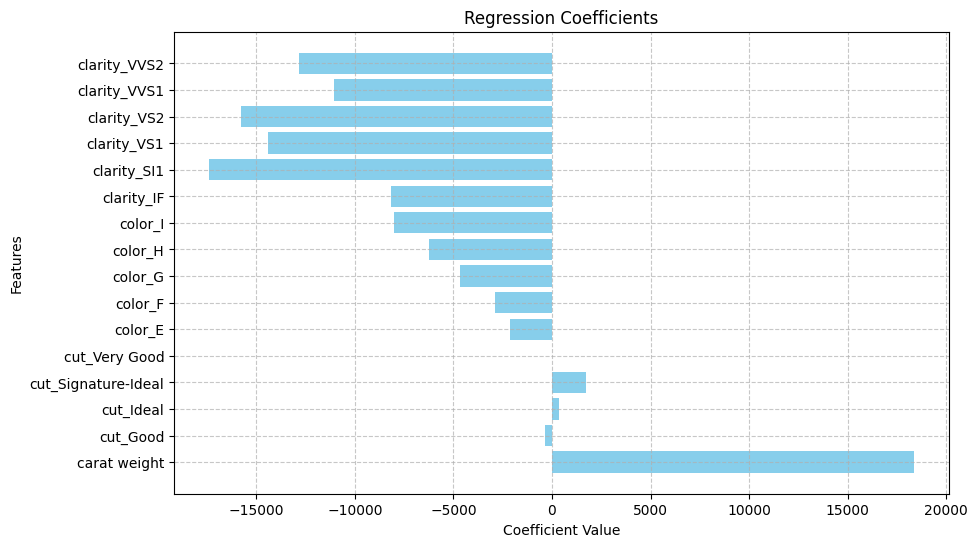

In [ ]:
# L2-регуляризация
model, _, _, _, _ = resolve_regression(X, y, regularization='l2')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)

Regularization: None
Mean Absolute Error (MAE): 2389.50
Mean Squared Error (MSE): 16394574.88
R^2 Score: 0.85


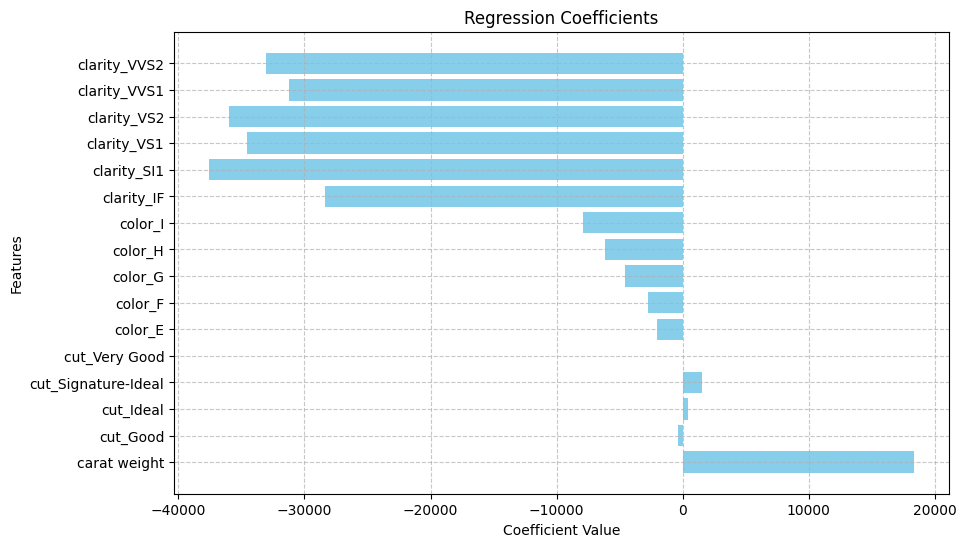

In [ ]:
# Без регуляризации
model, _, _, _, _  = resolve_regression(X, y, regularization=None)
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)
